# **NAME: AYUSHI SINGH**

# **SAP: 60009220202**

# **LAB 8**


# **Step 1: Load the Iris Dataset**

In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_iris()
X = data['data']
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Step 2: Implement PCA**

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


# **Step 3: Implement Autoencoders (Linear, Sigmoid, and ReLU based)**

**Linear Autoencoder**

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_scaled.shape[1]
encoding_dim = 3

linear_autoencoder = models.Sequential([
    layers.Dense(encoding_dim, input_shape=(input_dim,), activation='linear'),
    layers.Dense(input_dim, activation='linear')
])

linear_autoencoder.compile(optimizer='adam', loss='mse')
history_linear = linear_autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=8, verbose=0)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Sigmoid-based Non-Linear Autoencoder**

In [22]:

sigmoid_autoencoder = models.Sequential([
    layers.Dense(encoding_dim, input_shape=(input_dim,), activation='sigmoid'),
    layers.Dense(input_dim, activation='sigmoid')
])

sigmoid_autoencoder.compile(optimizer='adam', loss='mse')
history_sigmoid = sigmoid_autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=8, verbose=0)


**ReLU-based Non-Linear Autoencoder**

In [23]:

relu_autoencoder = models.Sequential([
    layers.Dense(encoding_dim, input_shape=(input_dim,), activation='relu'),
    layers.Dense(input_dim, activation='relu')
])

relu_autoencoder.compile(optimizer='adam', loss='mse')
history_relu = relu_autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=8, verbose=0)


# **Step 4: Encode the Input Data Using Autoencoders**

In [24]:

linear_autoencoder.compile(optimizer='adam', loss='mse')
linear_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)


sigmoid_autoencoder.compile(optimizer='adam', loss='mse')
sigmoid_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)


relu_autoencoder.compile(optimizer='adam', loss='mse')
relu_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0525 - val_loss: 0.0741
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - val_loss: 0.0746
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - val_loss: 0.0746
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - val_loss: 0.0738
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - val_loss: 0.0737
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0457 - val_loss: 0.0729
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0454 - val_loss: 0.0725
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0390 - val_loss: 0.0722
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - val_loss: 0.0719
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0368 - val_loss: 0.0712
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0376 - val_loss: 0.0706
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - val_loss: 0.0702
Epoch 13/50

In [25]:
from keras import models
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


input_dim = X_scaled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(3, activation='linear')(input_layer)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

linear_autoencoder = models.Model(inputs=input_layer, outputs=decoded)
linear_autoencoder.compile(optimizer='adam', loss='mse')
linear_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16)

encoder_layer_linear = models.Model(inputs=input_layer, outputs=encoded)
X_encoded_linear = encoder_layer_linear.predict(X_scaled)


input_layer_sigmoid = layers.Input(shape=(input_dim,))
encoded_sigmoid = layers.Dense(3, activation='sigmoid')(input_layer_sigmoid)
decoded_sigmoid = layers.Dense(input_dim, activation='sigmoid')(encoded_sigmoid)

sigmoid_autoencoder = models.Model(inputs=input_layer_sigmoid, outputs=decoded_sigmoid)
sigmoid_autoencoder.compile(optimizer='adam', loss='mse')
sigmoid_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16)

encoder_layer_sigmoid = models.Model(inputs=input_layer_sigmoid, outputs=encoded_sigmoid)
X_encoded_sigmoid = encoder_layer_sigmoid.predict(X_scaled)

input_layer_relu = layers.Input(shape=(input_dim,))
encoded_relu = layers.Dense(3, activation='relu')(input_layer_relu)
decoded_relu = layers.Dense(input_dim, activation='linear')(encoded_relu)

relu_autoencoder = models.Model(inputs=input_layer_relu, outputs=decoded_relu)
relu_autoencoder.compile(optimizer='adam', loss='mse')
relu_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16)

encoder_layer_relu = models.Model(inputs=input_layer_relu, outputs=encoded_relu)
X_encoded_relu = encoder_layer_relu.predict(X_scaled)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8825  
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7532 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7949 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7949 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6385 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6170 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5868 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5507 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5294 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5479 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4529 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4731 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4791 
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4131 
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3644 
Epo

# **PCA Implementation**

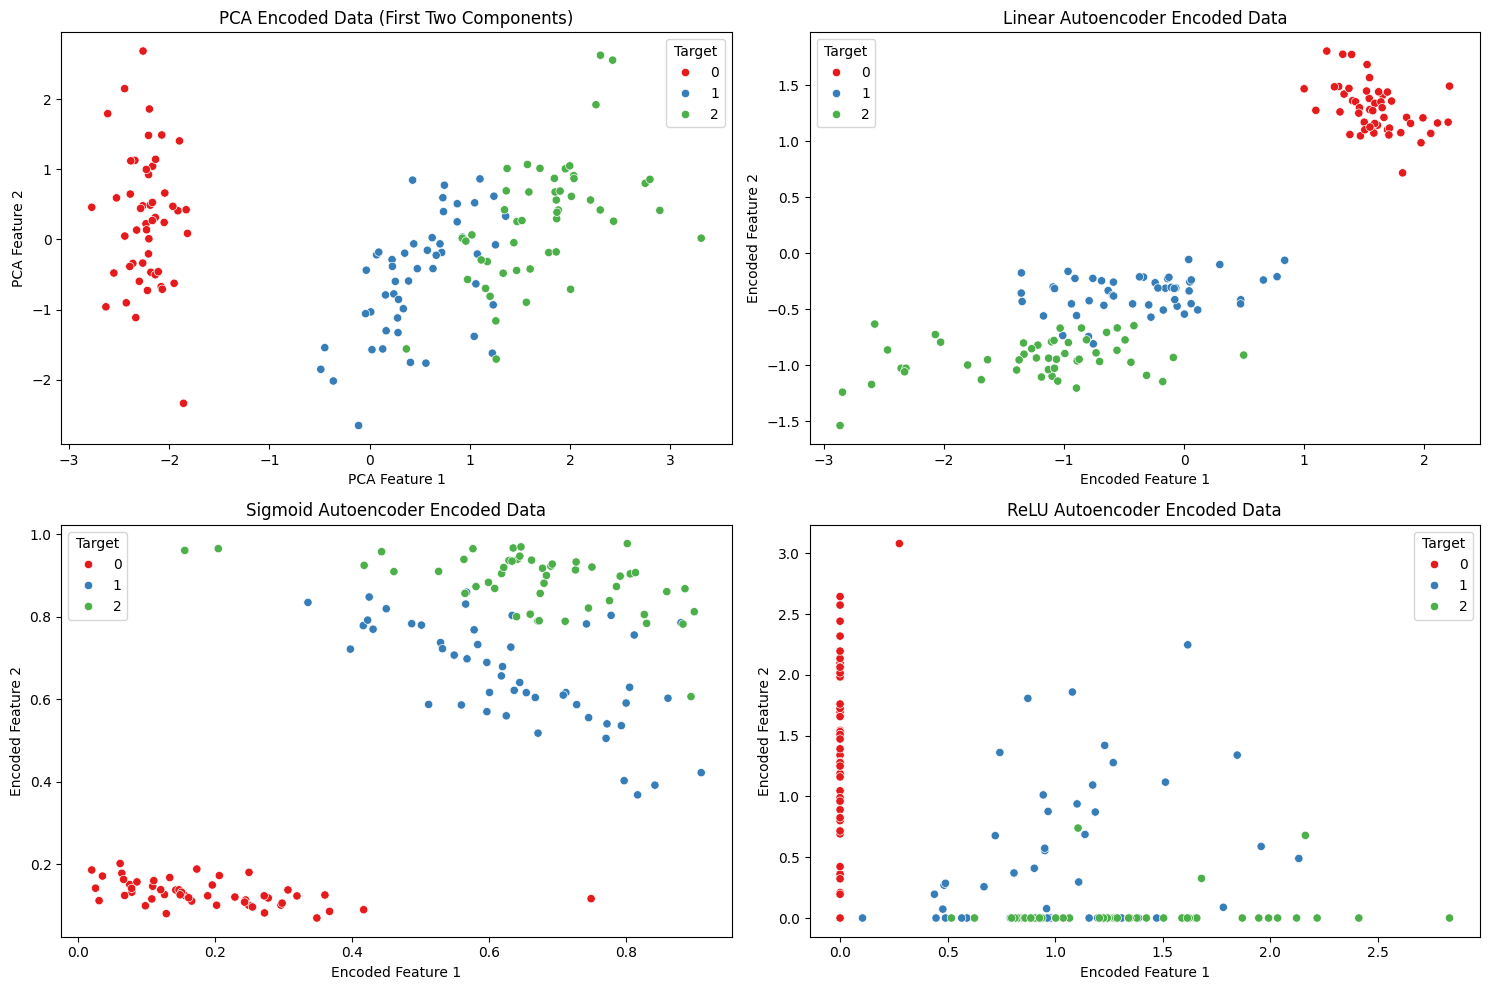

In [26]:
# Visualization
plt.figure(figsize=(15, 10))

# PCA
plt.subplot(2, 2, 1)
sns.scatterplot(data=pd.DataFrame(X_encoded_pca, columns=['PCA Feature 1', 'PCA Feature 2', 'PCA Feature 3']).assign(Target=y),
                 x='PCA Feature 1', y='PCA Feature 2', hue='Target', palette='Set1')
plt.title('PCA Encoded Data (First Two Components)')

# Linear Autoencoder
plt.subplot(2, 2, 2)
sns.scatterplot(data=pd.DataFrame(X_encoded_linear, columns=['Encoded Feature 1', 'Encoded Feature 2', 'Encoded Feature 3']).assign(Target=y),
                 x='Encoded Feature 1', y='Encoded Feature 2', hue='Target', palette='Set1')
plt.title('Linear Autoencoder Encoded Data')

# Sigmoid Autoencoder
plt.subplot(2, 2, 3)
sns.scatterplot(data=pd.DataFrame(X_encoded_sigmoid, columns=['Encoded Feature 1', 'Encoded Feature 2', 'Encoded Feature 3']).assign(Target=y),
                 x='Encoded Feature 1', y='Encoded Feature 2', hue='Target', palette='Set1')
plt.title('Sigmoid Autoencoder Encoded Data')

# ReLU Autoencoder
plt.subplot(2, 2, 4)
sns.scatterplot(data=pd.DataFrame(X_encoded_relu, columns=['Encoded Feature 1', 'Encoded Feature 2', 'Encoded Feature 3']).assign(Target=y),
                 x='Encoded Feature 1', y='Encoded Feature 2', hue='Target', palette='Set1')
plt.title('ReLU Autoencoder Encoded Data')

plt.tight_layout()
plt.show()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1284 
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1233 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1241  
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1153 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1191 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1112 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1150 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1050  
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1020  
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1014 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1072  
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0876 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0906
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1007  
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0971  

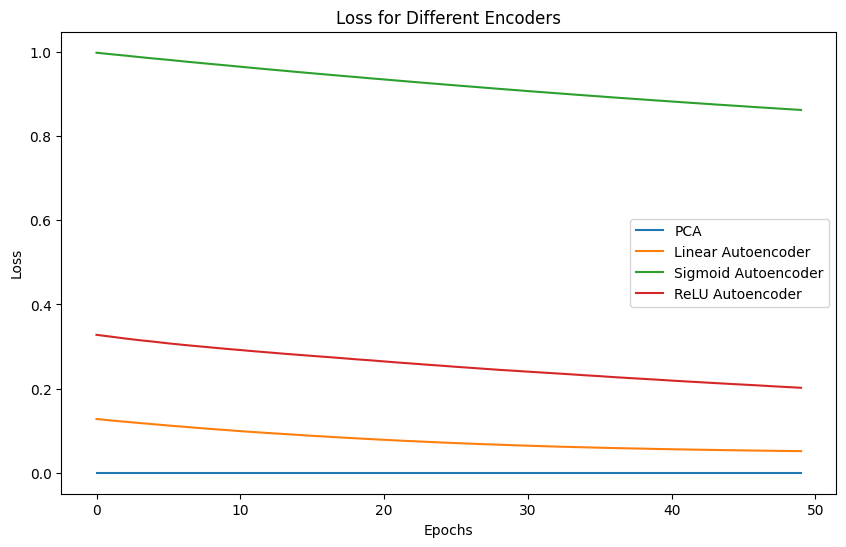

In [27]:
import matplotlib.pyplot as plt

losses = {
    "PCA": [],
    "Linear Autoencoder": [],
    "Sigmoid Autoencoder": [],
    "ReLU Autoencoder": []
}

linear_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16)
losses["Linear Autoencoder"] = linear_autoencoder.history.history['loss']

sigmoid_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16)
losses["Sigmoid Autoencoder"] = sigmoid_autoencoder.history.history['loss']

relu_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16)
losses["ReLU Autoencoder"] = relu_autoencoder.history.history['loss']

losses["PCA"] = [0] * len(losses["Linear Autoencoder"])

plt.figure(figsize=(10, 6))
for encoder, loss in losses.items():
    plt.plot(loss, label=encoder)

plt.title('Loss for Different Encoders')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
